<a href="https://colab.research.google.com/github/Andrea-24744/Simulaci-n-1/blob/main/Ejercico_Flecha_y_cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodología de la Simulación
*Santelices Medina Andrea*

#Ejercicio

Una flecha será ensamblada en un cojinete como se muestra a continuación:
<div align="center">
<img src = "https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQwylpmMKSM1Syy0uyNqG_5CuC5ox8WUs95pj0Zj1Nwm5D2STbK" width = "250"/>
</div>

Si  $X_1$ sigue una distribución normal con media 1.5 y varianza 0.0016, y $X_2$
  sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:

* a) La probabilidad de que haya interferencia.

* b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.

**PASO 1**. Defina las variables que intervienen en el modelo.

$$x_1 \sim N(1.5,0.04)$$

$$x_2 \sim N(1.48,0.03)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$x_1 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.04)}e^{\frac{-(x-1.5)^2}{2(0.0016)}}$$

$$x_2 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.03)}e^{\frac{-(x-1.48)^2}{2(0.0009)}}$$

**PASO 3**. Modele las variables aleatorias

*Modelaremos las variables aleatorias por el método Box-Muller:*

---
* <p style="text-align: justify;">El metódo Box-Muller es preferible al de las 12 uniformes y al de la aproximación central, puesto que genera numeros aleatorios de manera más eficiente y precisa.</p>

* <p style="text-align: justify;">En las 12 unifromes, el principal problema es que necesita 12 v.a, por lo que es menos eficiente cuando se trata de muestras altamente precisas.</p>

* <p style="text-align: justify;">Apesar de que la aproximación central es una opción sumamente rápida y sencilla de aplicar, es límitada. </p>

**Pseudocódigo**

1. Generar $U_1, U_2  \sim U(0,1)$

2. Hacer: $\quad R=\sqrt{-2lnU_1}\qquad , \qquad \theta=2\pi  U_2$

3. Hacer: $\quad X_1=Rcos(\theta) \qquad ,\quad X_2=Rsen(\theta)$

4. Salida: $X_1, X_2$





In [61]:
import numpy as np
import random
#Generar numeros aleatorios que tienen una distribución normal
x_1 = np.random.normal(1.5,0.04)
x_2 = np.random.normal(1.48,0.03)

**PASO 4**. Defina el modelo del sistema y los objetivos de la simulación

<p style="text-align: justify;">Queremos determinar la probabilidad de interferencia, o mejor dicho, la probabilidad de los posibles errores en el ensamblaje de la pieza, que será el caso en el que la flecha "*$x_2$*", sea mayor o igual al epacio establecido para ella "*$x_1$*"</p>

$i.e \quad$ ***condición de interferencia:***

$$x_2 \geq x_1$$

$\therefore \quad $***Buscamos*** $\quad P(x_2 \geq x_1)$

**PASO 5**. Genere números aleatorios.

In [8]:
import numpy as np
import random
# Simplemente generamos 2 numeros aleatorios, tal que si cumplen una condicion
# los va sumando para al final dividirlo entre todos los generados
def exp(n):
    s=0
    for _  in range(n):
        x_1=np.random.normal(1.5,0.04,1)
        x_2=np.random.normal(1.48,0.03,1)
        if x_2 >= x_1:
            s+=1
    prob=s/n
    return prob


**PASO 6**. Repetir M veces el experimento

In [44]:
def muestra(m):       # Repeticiones, es decir, las veces que vamos a repetir nuestro experimento agrando todas en una lista
    l=[]                # para englobar una replica de la modelacion y posteriormente ver su convergencia
    for i in range(m):
        d =exp(i+1)
        l.append(d)
    return l

n = 10


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

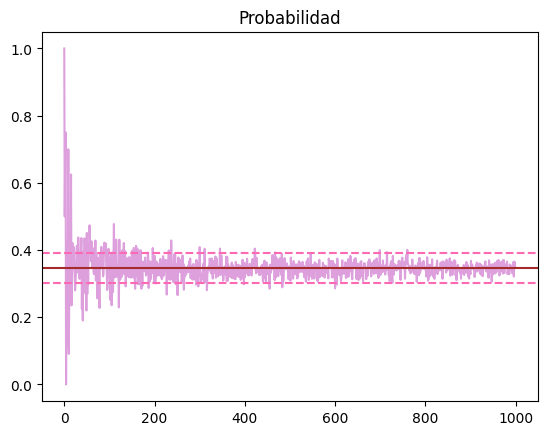

In [27]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
n = 10
m = 1000
A = muestra(m)

# Generamos nuestra grafica para visualizar hasta que punto se estabilizan las fluctuaciones
plt.plot(A, color="plum")
plt.title('Probabilidad')
plt.axhline(y=np.mean(A), color='brown', label="media:")
plt.axhline(y=np.mean(A)+np.std(A),color='hotpink', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(A)-np.std(A), color='hotpink', linestyle='--')
plt.show()

**PASO 8**. Replique el modelo.

In [29]:
def simulacion_m(r):    # de las repeticiones hechas en la muestra para nuestro experimento, guardaremos ahora sus medias
    L = []                  # para estimar el valor esperado
    for i in range(r):
        L.append(np.mean(exp(1000)))
    return L

In [39]:
simulacion = simulacion_m(550) #Establecemos una n lo suficientemente grande para ver su comportamiento en el histograma

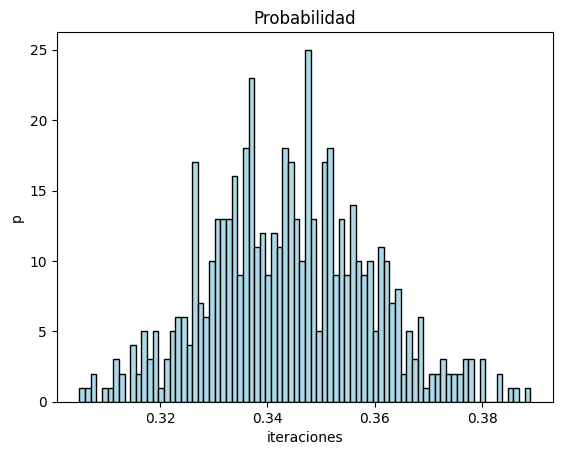

In [40]:
# Generamos histograma
plt.hist(simulacion, bins=80, color="lightblue", edgecolor="black")
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de interferencia y su desviación
estándar.




In [45]:
print('La media de la muestra es:',np.mean(simulacion))
print('La varianza de la muestra es:', np.var(simulacion))
print('La desviación estandar de la muestra es:', np.std(simulacion))

La media de la muestra es: 0.34416727272727277
La varianza de la muestra es: 0.0002288447471074378
La desviación estandar de la muestra es: 0.015127615380734592


##**a)**
$i.e \quad $  la probabilidad es el valor al que tienden nuestros datos en la simulación, en otras palabras, la media de nuestra simulación

$\therefore  \quad P(x_2 \geq x_1) \approx 0.344167$

---
##Solución analítica
---
---

Antes de finalizar y realizar el último paso (el paso 10), determinemos la solución analítica a nuestro problema:

Del problema tenemos:

$$x_2 \geq x_1 \implies x_2 - x_1 \geq 0$$

Entonces, definimos una nueva variable de la forma:
$$t=x_2 - x_1 \geq 0$$

$$ \implies t \sim N(\mu_t,\sigma_t)$$

Por lo tanto
$$\mu_t=\mu_2-\mu_1=1.48-1.5=-0.02$$


$$\sigma_t=\sqrt{\sigma_1^2+\sigma_2^2}=\sqrt{0.0016+0.0009}=0.05$$

$$i.e \quad  t\sim N(-0.02,0.05)$$

Ahora nuestra $f(t)$*(función de densidad)* nos quedaría:

$$f(t) = \frac{1}{\sqrt{2\pi}(0.05)}e^{\frac{-(x+0.2)^2}{2(0.0025)}}$$

Por lo que determinar la probabilidad, implica determinar la función de distribución acumulativa, es decir: $\quad P(t \geq 0) = P(x_2 - x_1 \geq 0) = F(t)$

$$F(t) = \int_0^{\chi_2 - \chi_1}\frac{1}{\sqrt{2\pi}(0.05)}e^{\frac{-(x+0.2)^2}{2(0.0025)}}$$
Finalmente obtenemos:


In [46]:
import scipy.stats
# Con esta función realizamos de manera directa nuestra integral
prob = 1 - scipy.stats.norm.cdf(0, -0.02,0.05)
print(prob)


0.3445782583896758


**$i.e \quad P(t \geq 0) \approx 0.34457$**

---

## **b)**

<p style="text-align: justify;">El número de veces que es necesario simular el experimento, si se  que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.<p>

<p style="text-align: justify;">La gráfica correspondiente al paso 7 permite identificar el tamaño de muestra requerido para garantizar la convergencia estadística del estimador. En función de dicha representación, se observa que ***$400$*** replicas del experimento son suficientes para alcanzar una estimación estable, con un error absoluto mínimo respecto al valor verdadero.<p>

---

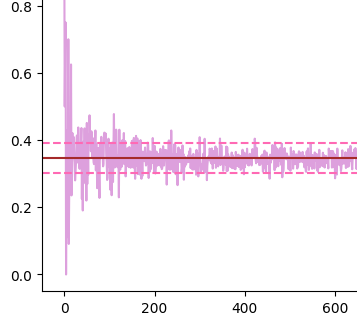

**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interferencia con un nivel de confianza del $95 \%$.

In [59]:
#Ocuparemos todo lo obtenido de la solución analítica m = 0.344, d = 0.05
#Tomando n como las repeticiones necesarias para la convergencia, lo que se dijo anteriormente, es decir n =400
h = 400
z = 1.96  # para 95% de confianza
desv = 0.05
m = prob

# Intervalo de confianza (para variables que siguen una distribución normal) se define:
lim_inf = m - (z *2*desv)/np.sqrt(h)
lim_sup = m + (z *2*desv)/np.sqrt(h)

print(f"El intervalo de confianza del 95% es: ({lim_inf:.4f}, {lim_sup:.4f})")

El intervalo de confianza del 95% es: (0.3348, 0.3544)


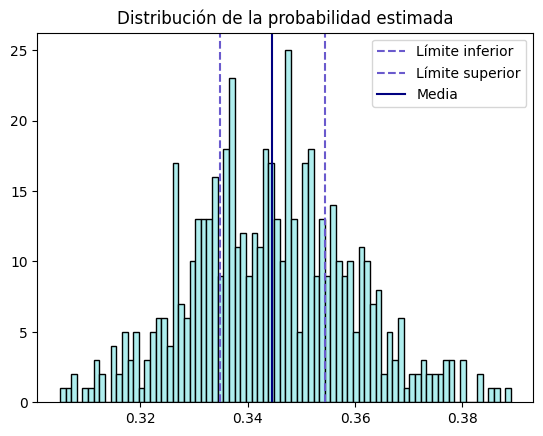

In [58]:
# Histograma definido en el rango del intervalo de confianza
plt.hist(simulacion, bins=80, color="paleturquoise", edgecolor="black")
plt.axvline(lim_inf, color='slateblue', linestyle='--', label='Límite inferior')
plt.axvline(lim_sup, color='slateblue', linestyle='--', label='Límite superior')
plt.axvline(m, color='navy', linestyle='-', label='Media')
plt.title('Distribución de la probabilidad estimada')
plt.legend()
plt.show()